# The code begins by importing necessary libraries, including but not limited to pandas, numpy, and scikit-learn.

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import matplotlib.pyplot as ashcroft
import missingno as msno
import seaborn as sns

# The pertinent dataset is loaded into memory.

In [38]:
# Load the dataset
data = pd.read_csv("C:/Users/ashcr/Documents/healthcare-dataset-stroke-data.csv")

display(data)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## To see how people in the dataset actually have stroke

1. if the dataset is imbalance then you make sure it's balance

In [40]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# Exploratory Data Analysis Begins Here!

In [3]:
# Verifies the count of columns present within our dataset.

print("The total length of the healthcare stroke data  is: " , len(list(data[0:1:-1])))

The total length of the healthcare stroke data  is:  12


# Investigating the magnitude of the healthcare stroke dataset

1. Making use of the in-bulit feature of the Jupyter notebook

In [4]:
# The size of our dataset will be displayed using the code below.
# This will help we determine its characteristics and size.
print("The total size of healthcare stroke data is: ",  data.shape)

The total size of healthcare stroke data is:  (5110, 12)


# Verify each column for any missing values.

In [5]:
# To find the missing values, explore all columns.

[features for features in data.columns if data[features].isnull().sum()>0]

['bmi']

The size in row is: 5110


<AxesSubplot:>

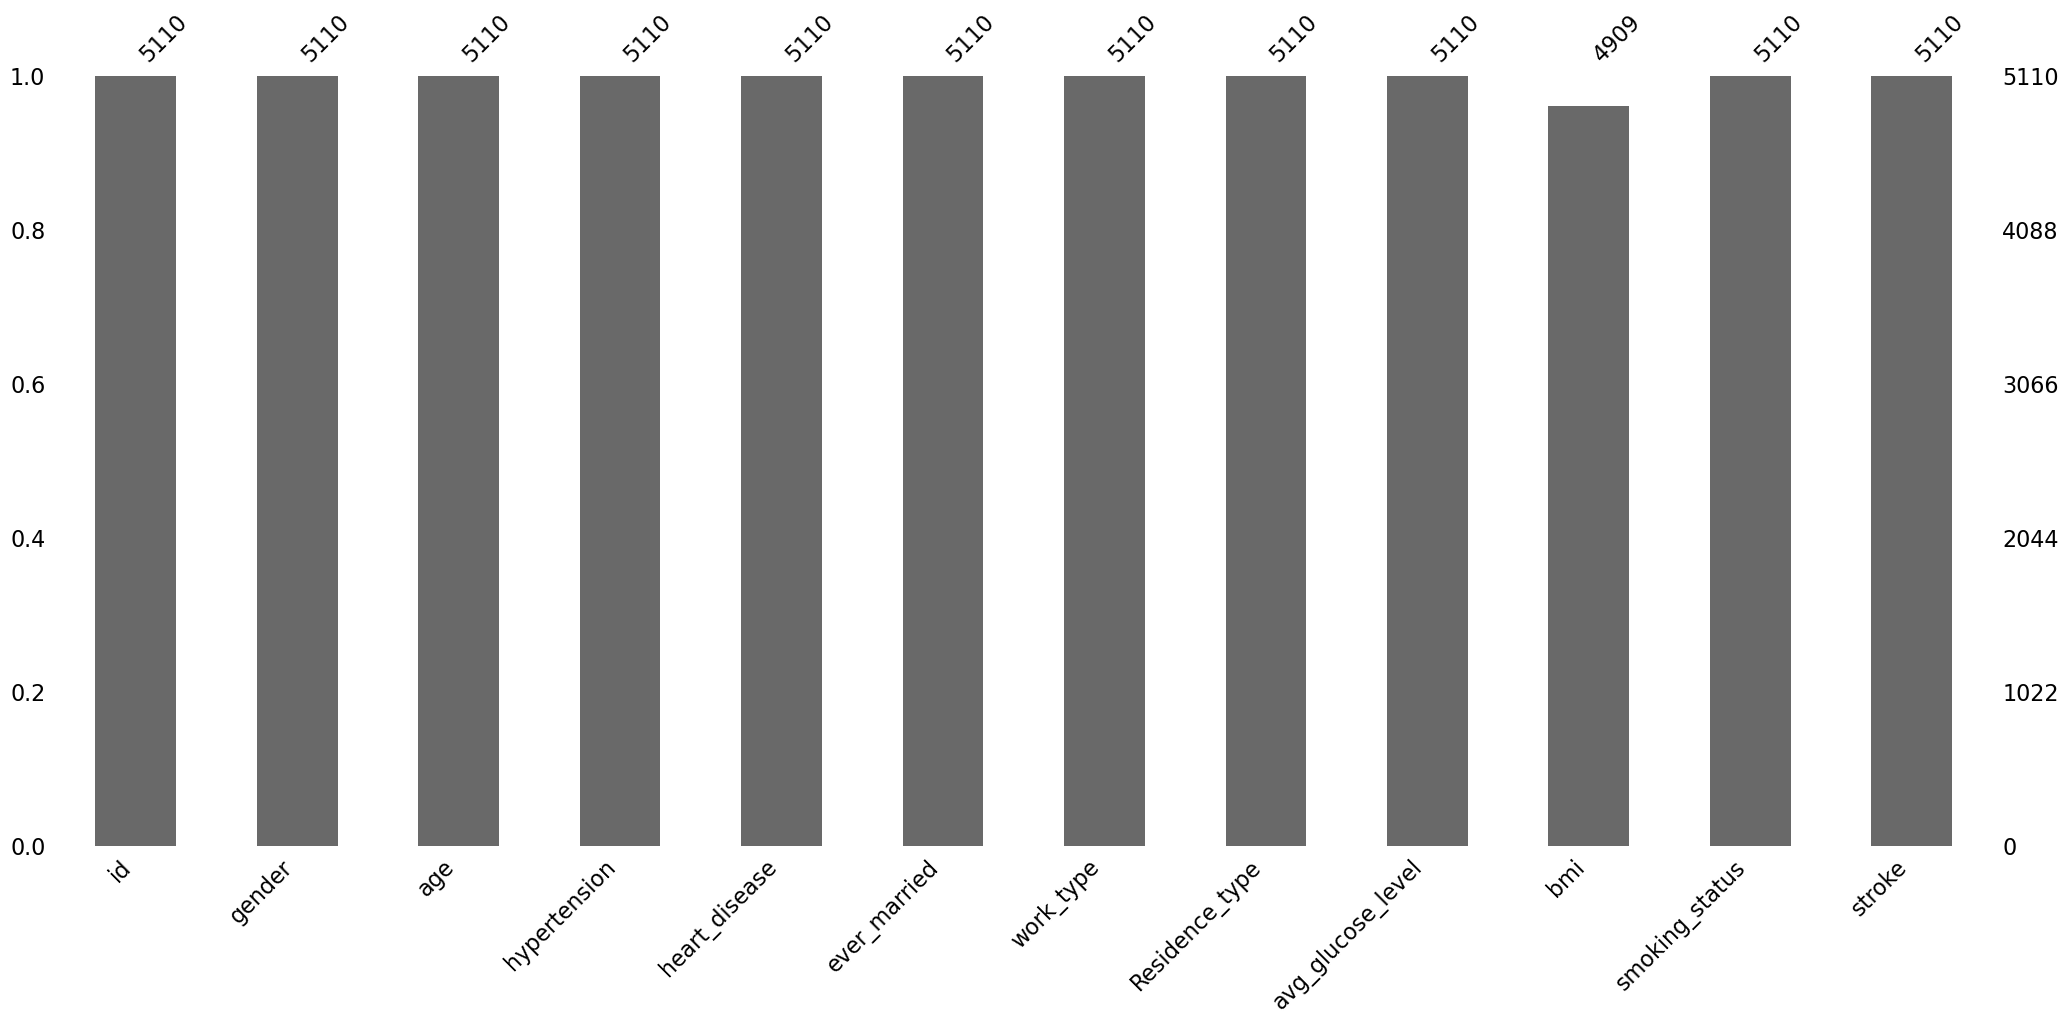

In [6]:
# Doing so clarifies the row size for us:
print ('The size in row is:', data.shape[0])
msno.bar(data)

# Check out each column's data formats.

In [7]:
 print(data.info())  # Check out each column's data formats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


# Statistical calculations would only be made on the numerical columns.

# 1. See some of the statistics that our dataset contains.

In [8]:
print(data.describe())  # Shows statistics that our dataset contains

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

# Displaying how the numerical columns are distributed

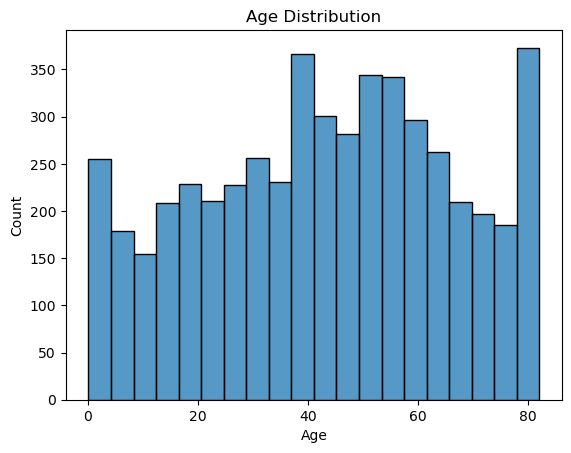

In [9]:
# Viewing the distribution of numerical columns
sns.histplot(data['age'], bins=20)
ashcroft.title('Age Distribution')
ashcroft.xlabel('Age')
ashcroft.ylabel('Count')
ashcroft.show()

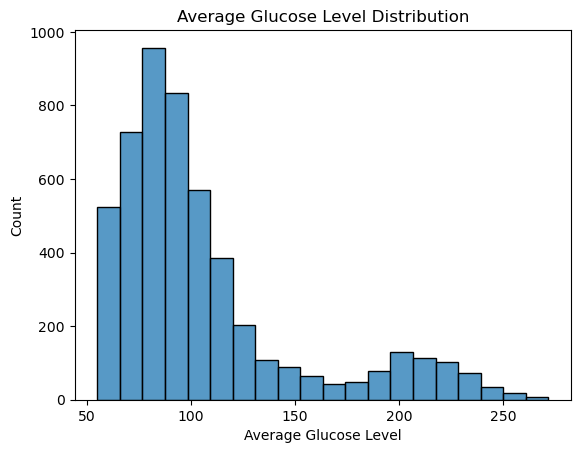

In [10]:
sns.histplot(data['avg_glucose_level'], bins=20)
ashcroft.title('Average Glucose Level Distribution')
ashcroft.xlabel('Average Glucose Level')
ashcroft.ylabel('Count')
ashcroft.show()

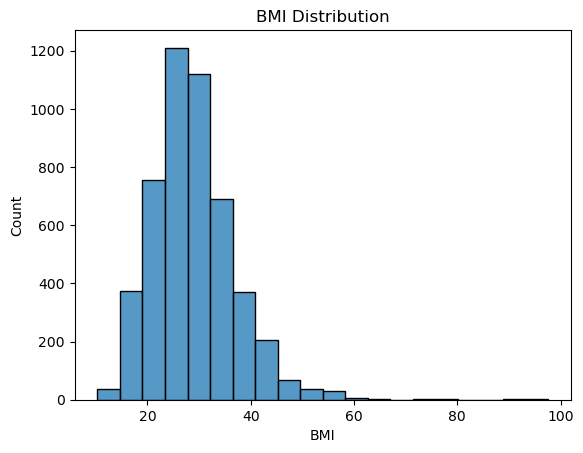

In [11]:
sns.histplot(data['bmi'], bins=20)
ashcroft.title('BMI Distribution')
ashcroft.xlabel('BMI')
ashcroft.ylabel('Count')
ashcroft.show()

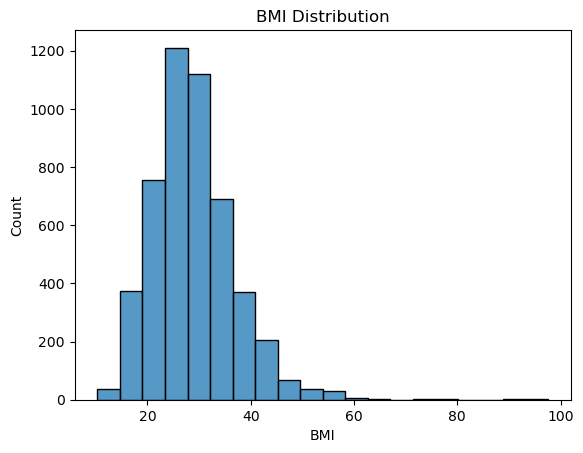

In [12]:
sns.histplot(data['bmi'], bins=20)
ashcroft.title('BMI Distribution')
ashcroft.xlabel('BMI')
ashcroft.ylabel('Count')
ashcroft.show()

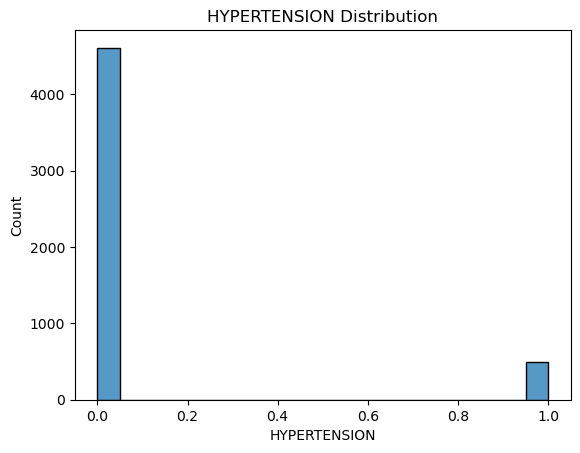

In [13]:
sns.histplot(data['hypertension'], bins=20)
ashcroft.title('HYPERTENSION Distribution')
ashcroft.xlabel('HYPERTENSION')
ashcroft.ylabel('Count')
ashcroft.show()

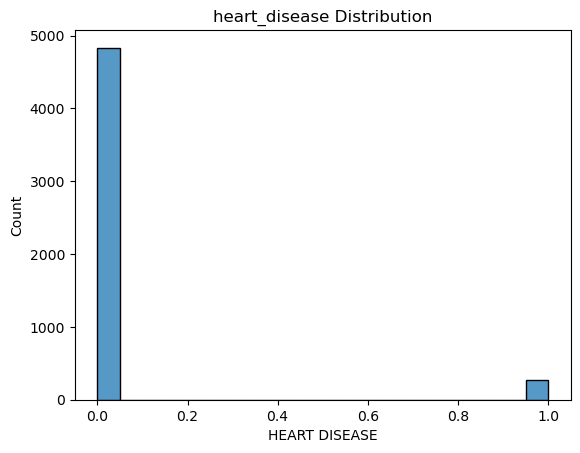

In [14]:
sns.histplot(data['heart_disease'], bins=20)
ashcroft.title('heart_disease Distribution')
ashcroft.xlabel('HEART DISEASE')
ashcroft.ylabel('Count')
ashcroft.show()

# An illustration of the relationship among the numerical columns

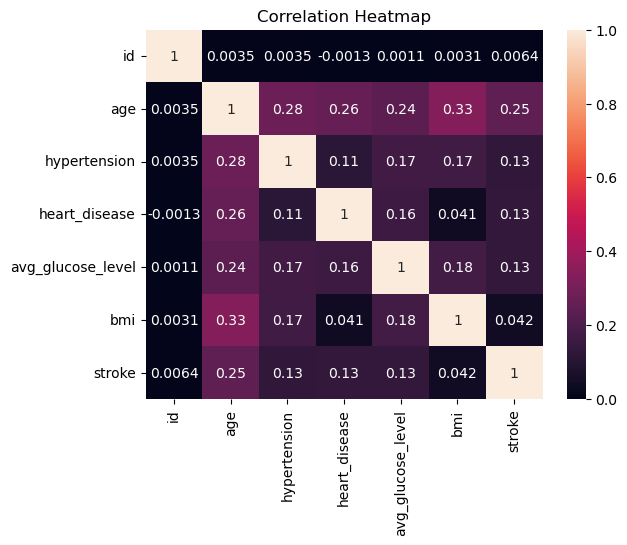

In [15]:
sns.heatmap(data.corr(), annot=True)
ashcroft.title('Correlation Heatmap')
ashcroft.show()

# The distribution of category columns is represented visually

C:\Users\ashcr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


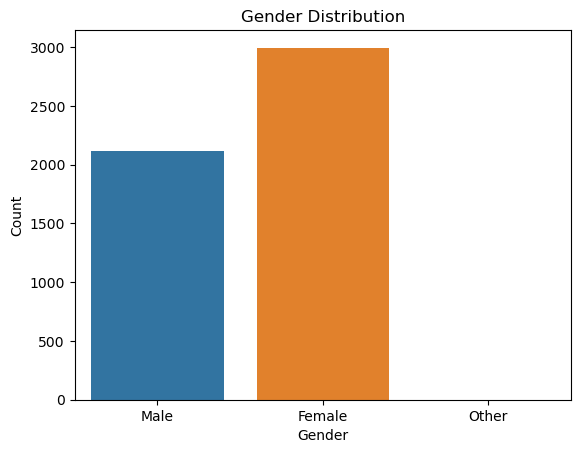

In [16]:
# Visualizing the distribution of categorical columns
sns.countplot(data['gender'])
ashcroft.title('Gender Distribution')
ashcroft.xlabel('Gender')
ashcroft.ylabel('Count')
ashcroft.show()

C:\Users\ashcr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


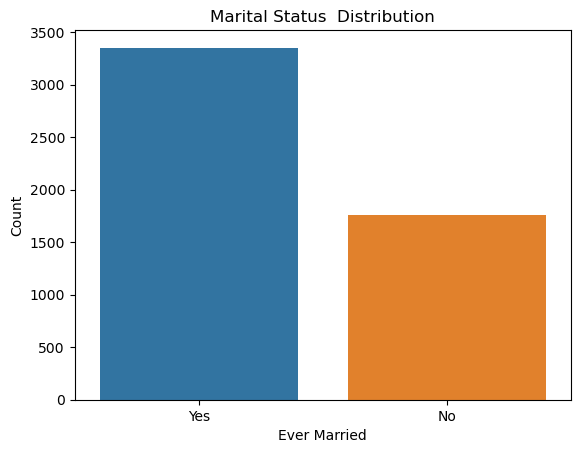

In [17]:
sns.countplot(data['ever_married'])
ashcroft.title('Marital Status  Distribution')
ashcroft.xlabel('Ever Married')
ashcroft.ylabel('Count')
ashcroft.show()

C:\Users\ashcr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


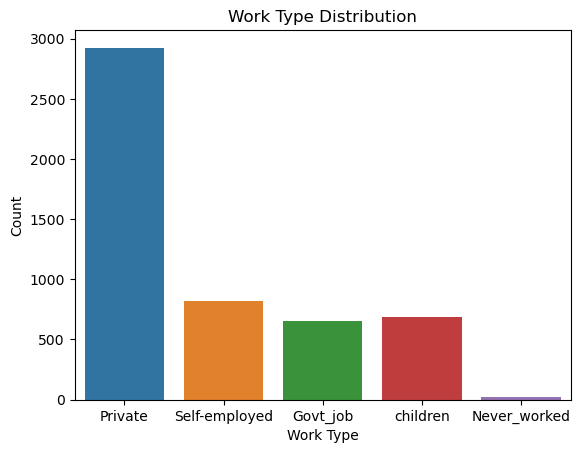

In [18]:
sns.countplot(data['work_type'])
ashcroft.title('Work Type Distribution')
ashcroft.xlabel('Work Type')
ashcroft.ylabel('Count')
ashcroft.show()

C:\Users\ashcr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


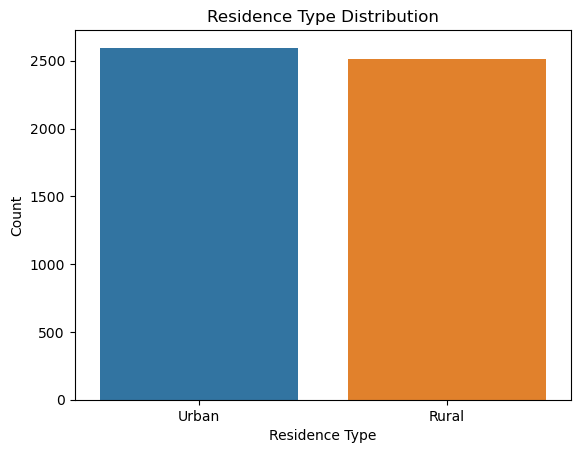

In [19]:
sns.countplot(data['Residence_type'])
ashcroft.title('Residence Type Distribution')
ashcroft.xlabel('Residence Type')
ashcroft.ylabel('Count')
ashcroft.show()

C:\Users\ashcr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


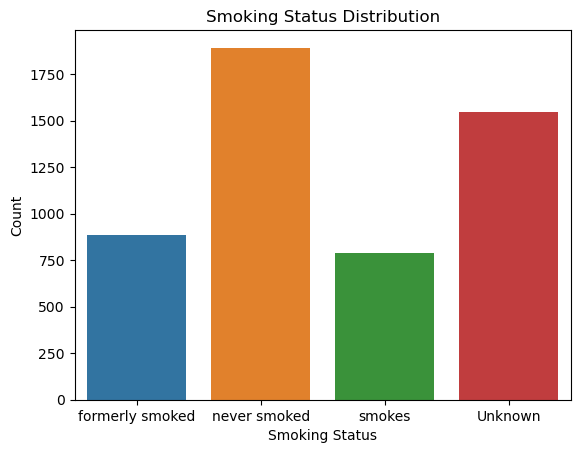

In [20]:
sns.countplot(data['smoking_status'])
ashcroft.title('Smoking Status Distribution')
ashcroft.xlabel('Smoking Status')
ashcroft.ylabel('Count')
ashcroft.show()

# Highlighting the connection between the categories and numerical columns

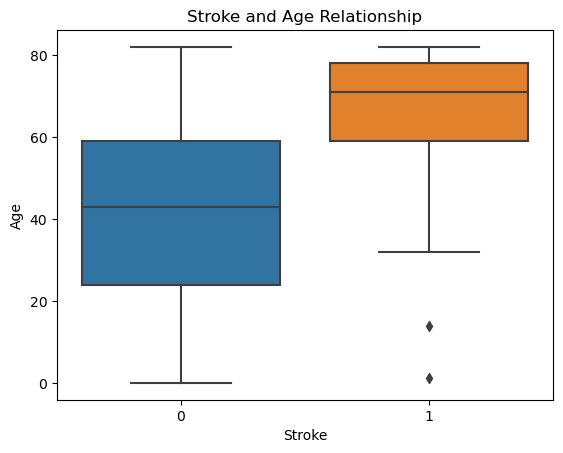

In [21]:
# Visualizing the relationship between categorical and numerical columns
sns.boxplot(x='stroke', y='age', data=data)
ashcroft.title('Stroke and Age Relationship')
ashcroft.xlabel('Stroke')
ashcroft.ylabel('Age')
ashcroft.show()


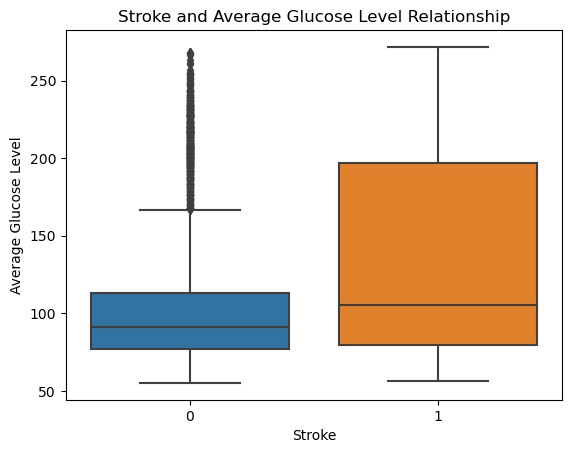

In [22]:
sns.boxplot(x='stroke', y='avg_glucose_level', data=data)
ashcroft.title('Stroke and Average Glucose Level Relationship')
ashcroft.xlabel('Stroke')
ashcroft.ylabel('Average Glucose Level')
ashcroft.show()

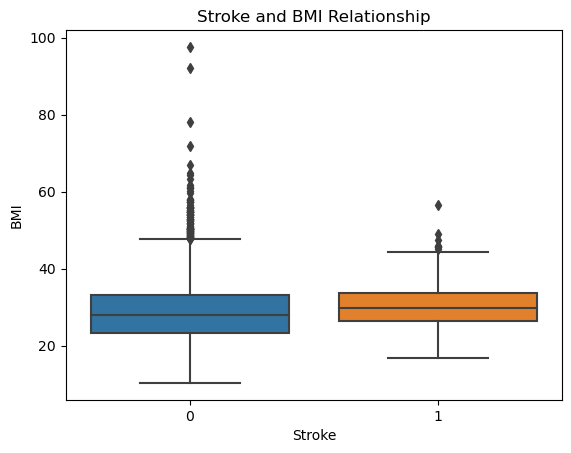

In [23]:
sns.boxplot(x='stroke', y='bmi', data=data)
ashcroft.title('Stroke and BMI Relationship')
ashcroft.xlabel('Stroke')
ashcroft.ylabel('BMI')
ashcroft.show()

In [ ]:
sns.boxplot(x='stroke', y='bmi', data=data)
ashcroft.title('Stroke and BMI Relationship')
ashcroft.xlabel('Stroke')
ashcroft.ylabel('BMI')
ashcroft.show()

# Preprocessing The Healthcare Dataset

# We drop the id column

In [24]:
data.drop('id', axis=1, inplace=True)  # drop the id column

# Rows containing Nan values are eliminated.

In [25]:
# Rows containing blank values are eliminated.
data.dropna(inplace=True)

# We define input and output variables for Fuzzy Logic

In [26]:
# Define input and output variables
age = ctrl.Antecedent(np.arange(0, 101, 1), 'age')
hypertension = ctrl.Antecedent(np.arange(0, 2, 1), 'hypertension')
heart_disease = ctrl.Antecedent(np.arange(0, 2, 1), 'heart_disease')
glucose = ctrl.Antecedent(np.arange(0, 301, 1), 'glucose')
bmi = ctrl.Antecedent(np.arange(0, 101, 1), 'bmi')
stroke_probability = ctrl.Consequent(np.arange(0, 101, 1), 'stroke_probability')

# We define membership functions

In [27]:
# Define membership functions
age['young'] = fuzz.trimf(age.universe, [0, 0, 40])
age['middle_aged'] = fuzz.trimf(age.universe, [35, 50, 65])
age['old'] = fuzz.trimf(age.universe, [60, 100, 100])

hypertension['no'] = fuzz.trimf(hypertension.universe, [0, 0, 1])
hypertension['yes'] = fuzz.trimf(hypertension.universe, [0, 1, 1])

heart_disease['no'] = fuzz.trimf(heart_disease.universe, [0, 0, 1])
heart_disease['yes'] = fuzz.trimf(heart_disease.universe, [0, 1, 1])

glucose['normal'] = fuzz.trimf(glucose.universe, [0, 0, 100])
glucose['pre_diabetic'] = fuzz.trimf(glucose.universe, [90, 150, 200])
glucose['diabetic'] = fuzz.trimf(glucose.universe, [190, 300, 300])

bmi['underweight'] = fuzz.trimf(bmi.universe, [0, 0, 18.5])
bmi['normal'] = fuzz.trimf(bmi.universe, [18.5, 25, 30])
bmi['overweight'] = fuzz.trimf(bmi.universe, [25, 35, 40])
bmi['obese'] = fuzz.trimf(bmi.universe, [30, 100, 100])


In [28]:
stroke_probability = ctrl.Consequent(np.arange(0, 101, 1), 'stroke_probability')
stroke_probability['low'] = fuzz.trimf(stroke_probability.universe, [0, 0, 50])
stroke_probability['medium'] = fuzz.trimf(stroke_probability.universe, [40, 50, 60])
stroke_probability['high'] = fuzz.trimf(stroke_probability.universe, [50, 100, 100])

rule1 = ctrl.Rule(antecedent=((age['young'] | age['middle_aged']) &
                              hypertension['no'] & heart_disease['no'] &
                              (glucose['normal'] | glucose['pre_diabetic']) &
                              (bmi['normal'] | bmi['underweight'])),
                  consequent=stroke_probability['low'],
                  label='rule_low')

rule2 = ctrl.Rule(antecedent=((age['middle_aged'] | age['old']) &
                  hypertension['yes'] & heart_disease['yes'] &
                  (glucose['pre_diabetic'] | glucose['diabetic']) &
                  (bmi['overweight'] | bmi['obese'])),
      consequent=stroke_probability['high'],
                 label='rule_high')

# We create control system and simulation

In [31]:
stroke_ctrl = ctrl.ControlSystem([rule1, rule2])
stroke_simulation = ctrl.ControlSystemSimulation(stroke_ctrl)

#  We pass inputs to the simulation

In [36]:
stroke_simulation.input['age'] = 60
stroke_simulation.input['hypertension'] = 1
stroke_simulation.input['heart_disease'] = 1
stroke_simulation.input['glucose'] = 180
stroke_simulation.input['bmi'] = 35


In [33]:
stroke_simulation.input['age'] = 65
stroke_simulation.input['hypertension'] = 8
stroke_simulation.input['heart_disease'] = 2
stroke_simulation.input['glucose'] = 150
stroke_simulation.input['bmi'] = 30

# We Run the simulation

In [37]:
stroke_simulation.compute()
print("Stroke Probability:", stroke_simulation.output['stroke_probability'])

Stroke Probability: 78.88888888888884


# We print the output of to the it looks

C:\Users\ashcr\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


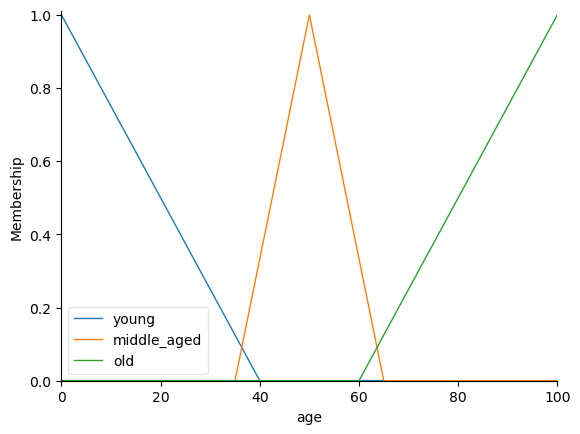

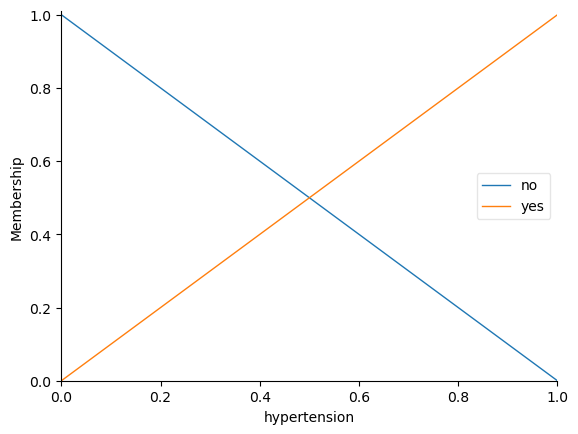

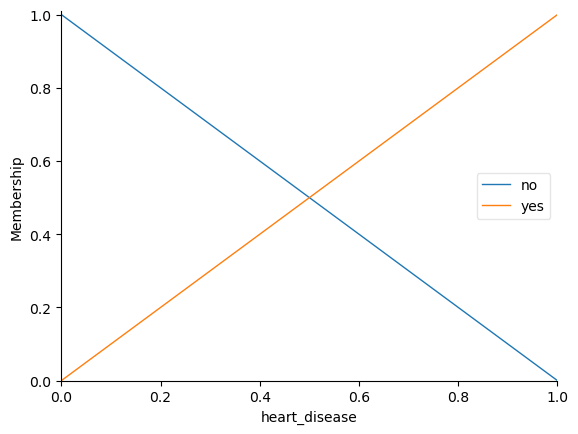

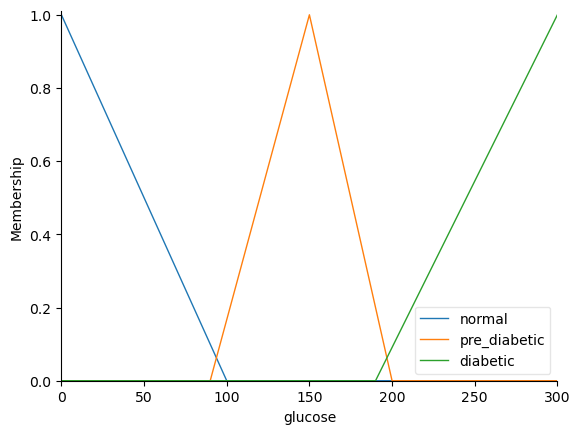

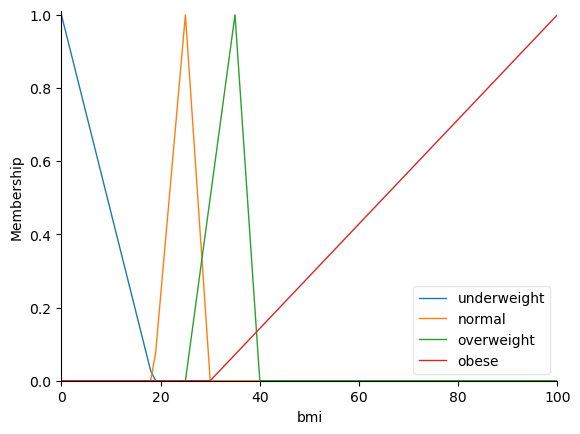

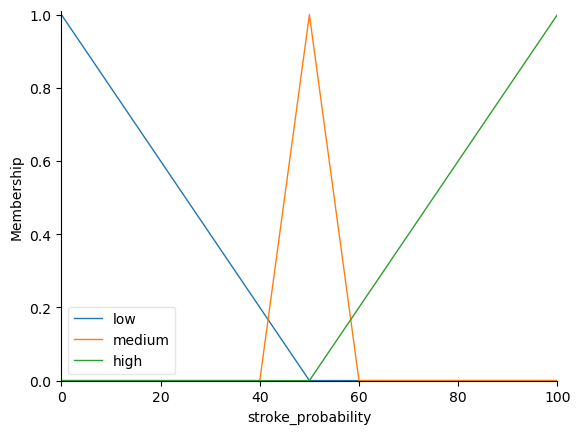

In [35]:
age.view()
hypertension.view()
heart_disease.view()
glucose.view()
bmi.view()
stroke_probability.view()

ashcroft.show()
